In [17]:
import pandas as pd
import datetime as dt
import numpy as np

import sys
sys.path.insert(1, '../functions/functions')
from functions import adjust_for_splits


In [18]:
file_name = './combined_stocks.csv'
combined_df = pd.read_csv(file_name,
                parse_dates=True
                ).dropna()

combined_df.head(5)

,date,open (amzn),high (amzn),low (amzn),close (amzn),volume (amzn),open (goog),high (goog),low (goog),close (goog),...,open (orcl),high (orcl),low (orcl),close (orcl),volume (orcl),open (tsla),high (tsla),low (tsla),close (tsla),volume (tsla)
0,2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0,1301.00,1305.830,1281.00,1289.92,...,56.23,56.46,55.38,55.43,14313982.0,329.40,336.38,328.69,334.87,6081986.0
1,2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0,1279.57,1298.461,1279.00,1295.28,...,54.62,54.99,54.46,54.59,14320507.0,332.62,337.91,332.19,336.20,6613476.0
2,2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0,1307.01,1325.800,1304.87,1320.54,...,54.90,54.90,54.18,54.41,11436774.0,337.75,337.86,332.85,333.03,5536255.0
3,2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0,1328.00,1329.358,1316.44,1328.13,...,54.50,54.83,54.30,54.68,10557403.0,332.83,334.42,327.25,330.37,3736976.0
4,2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0,1333.44,1344.000,1333.44,1340.62,...,55.03,55.13,54.61,54.83,9088555.0,335.00,338.86,334.77,335.89,7618937.0


In [19]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df['newdate'] = combined_df['date'].dt.date
combined_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1258 non-null   datetime64[ns]
 1   open (amzn)    1258 non-null   float64       
 2   high (amzn)    1258 non-null   float64       
 3   low (amzn)     1258 non-null   float64       
 4   close (amzn)   1258 non-null   float64       
 5   volume (amzn)  1258 non-null   float64       
 6   open (goog)    1258 non-null   float64       
 7   high (goog)    1258 non-null   float64       
 8   low (goog)     1258 non-null   float64       
 9   close (goog)   1258 non-null   float64       
 10  volume (goog)  1258 non-null   float64       
 11  open (meta)    1258 non-null   float64       
 12  high (meta)    1258 non-null   float64       
 13  low (meta)     1258 non-null   float64       
 14  close (meta)   1258 non-null   float64       
 15  volume (meta)  1258 n

In [20]:

output_df = combined_df.copy()
output_df.head(5)

,date,open (amzn),high (amzn),low (amzn),close (amzn),volume (amzn),open (goog),high (goog),low (goog),close (goog),...,high (orcl),low (orcl),close (orcl),volume (orcl),open (tsla),high (tsla),low (tsla),close (tsla),volume (tsla),newdate
0,2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0,1301.00,1305.830,1281.00,1289.92,...,56.46,55.38,55.43,14313982.0,329.40,336.38,328.69,334.87,6081986.0,2019-12-02
1,2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0,1279.57,1298.461,1279.00,1295.28,...,54.99,54.46,54.59,14320507.0,332.62,337.91,332.19,336.20,6613476.0,2019-12-03
2,2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0,1307.01,1325.800,1304.87,1320.54,...,54.90,54.18,54.41,11436774.0,337.75,337.86,332.85,333.03,5536255.0,2019-12-04
3,2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0,1328.00,1329.358,1316.44,1328.13,...,54.83,54.30,54.68,10557403.0,332.83,334.42,327.25,330.37,3736976.0,2019-12-05
4,2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0,1333.44,1344.000,1333.44,1340.62,...,55.13,54.61,54.83,9088555.0,335.00,338.86,334.77,335.89,7618937.0,2019-12-06


In [21]:


for symbol in ['amzn', 'goog', 'meta', 'nvda', 'orcl', 'tsla']:
    output_df[f"open ({symbol})"] = output_df.apply(lambda x: adjust_for_splits(symbol, x['newdate'], x[f"open ({symbol})"]), axis= 1)
    output_df[f"high ({symbol})"] = output_df.apply(lambda x: adjust_for_splits(symbol, x['newdate'], x[f"high ({symbol})"]), axis= 1)
    output_df[f"low ({symbol})"] = output_df.apply(lambda x: adjust_for_splits(symbol, x['newdate'], x[f"low ({symbol})"]), axis= 1)
    output_df[f"close ({symbol})"] = output_df.apply(lambda x: adjust_for_splits(symbol, x['newdate'], x[f"close ({symbol})"]), axis= 1)
            

output_df.head()


,date,open (amzn),high (amzn),low (amzn),close (amzn),volume (amzn),open (goog),high (goog),low (goog),close (goog),...,high (orcl),low (orcl),close (orcl),volume (orcl),open (tsla),high (tsla),low (tsla),close (tsla),volume (tsla),newdate
0,2019-12-02,90.2200,90.2775,88.1340,89.0800,3931750.0,65.0500,65.29150,64.0500,64.4960,...,56.46,55.38,55.43,14313982.0,21.960000,22.425333,21.912667,22.324667,6081986.0,2019-12-02
1,2019-12-03,88.0000,88.6435,87.3615,88.4980,3529582.0,63.9785,64.92305,63.9500,64.7640,...,54.99,54.46,54.59,14320507.0,22.174667,22.527333,22.146000,22.413333,6613476.0,2019-12-03
2,2019-12-04,88.7005,89.4545,88.0110,88.0345,2680700.0,65.3505,66.29000,65.2435,66.0270,...,54.90,54.18,54.41,11436774.0,22.516667,22.524000,22.190000,22.202000,5536255.0,2019-12-04
3,2019-12-05,88.1750,88.1750,87.0000,87.0240,2827852.0,66.4000,66.46790,65.8220,66.4065,...,54.83,54.30,54.68,10557403.0,22.188667,22.294667,21.816667,22.024667,3736976.0,2019-12-05
4,2019-12-06,87.5600,87.7200,87.0065,87.5800,3119979.0,66.6720,67.20000,66.6720,67.0310,...,55.13,54.61,54.83,9088555.0,22.333333,22.590667,22.318000,22.392667,7618937.0,2019-12-06


In [27]:
del output_df['newdate']
output_df.to_csv("combined_stocks_splits.csv", index=False)

In [28]:
file_name_test = './combined_stocks_splits.csv'
test_df = pd.read_csv(file_name_test,
                parse_dates=True
                ).dropna()

test_df.head(5)

,date,open (amzn),high (amzn),low (amzn),close (amzn),volume (amzn),open (goog),high (goog),low (goog),close (goog),...,open (orcl),high (orcl),low (orcl),close (orcl),volume (orcl),open (tsla),high (tsla),low (tsla),close (tsla),volume (tsla)
0,2019-12-02,90.2200,90.2775,88.1340,89.0800,3931750.0,65.0500,65.29150,64.0500,64.4960,...,56.23,56.46,55.38,55.43,14313982.0,21.960000,22.425333,21.912667,22.324667,6081986.0
1,2019-12-03,88.0000,88.6435,87.3615,88.4980,3529582.0,63.9785,64.92305,63.9500,64.7640,...,54.62,54.99,54.46,54.59,14320507.0,22.174667,22.527333,22.146000,22.413333,6613476.0
2,2019-12-04,88.7005,89.4545,88.0110,88.0345,2680700.0,65.3505,66.29000,65.2435,66.0270,...,54.90,54.90,54.18,54.41,11436774.0,22.516667,22.524000,22.190000,22.202000,5536255.0
3,2019-12-05,88.1750,88.1750,87.0000,87.0240,2827852.0,66.4000,66.46790,65.8220,66.4065,...,54.50,54.83,54.30,54.68,10557403.0,22.188667,22.294667,21.816667,22.024667,3736976.0
4,2019-12-06,87.5600,87.7200,87.0065,87.5800,3119979.0,66.6720,67.20000,66.6720,67.0310,...,55.03,55.13,54.61,54.83,9088555.0,22.333333,22.590667,22.318000,22.392667,7618937.0


<Axes: title={'center': 'Stock Prices'}, xlabel='Time', ylabel='Close Price'>

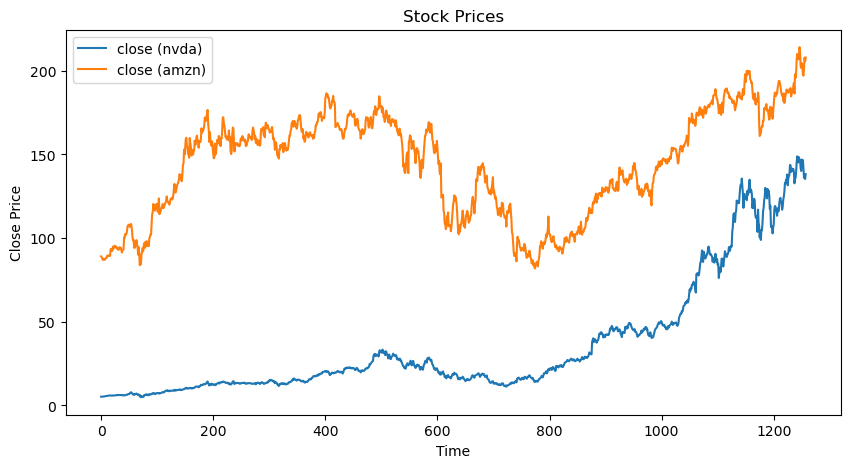

In [ ]:
# test_df['close (nvda)'].plot(title="Stock Prices", ylabel="Close Price", xlabel="Time", figsize=(10, 5), legend=True)
# test_df['close (amzn)'].plot(legend=True)